### Test that beliefs are correlated within dim, across dims

In [11]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy
import itertools

from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
all_beh = behavioral_utils.load_all_beh_for_sub("SA")

In [17]:
all_beh[[f"Next{x}Prob" for x in FEATURES]] = all_beh[[f"{x}Prob" for x in FEATURES]].shift(-1)
all_beh = all_beh[~all_beh["NextCIRCLEProb"].isna()]
all_beh[[f"{x}ProbDiff" for x in FEATURES]] = all_beh[[f"Next{x}Prob" for x in FEATURES]].values - all_beh[[f"{x}Prob" for x in FEATURES]].values

/tmp/ipykernel_836151/3362103553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_beh[[f"Next{x}Prob" for x in FEATURES]] = all_beh[[f"{x}Prob" for x in FEATURES]].shift(-1)
/tmp/ipykernel_836151/3362103553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_beh[[f"{x}ProbDiff" for x in FEATURES]] = all_beh[[f"Next{x}Prob" for x in FEATURES]].values - all_beh[[f"{x}Prob" for x in FEATURES]].values
/tmp/ipykernel_836151/3362103553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [18]:
res = []
for feat1, feat2 in list(itertools.combinations(FEATURES, 2)):
    dim_type = "within" if FEATURE_TO_DIM[feat1] == FEATURE_TO_DIM[feat2] else "across"
    corr = np.corrcoef(all_beh[f"{feat1}ProbDiff"], all_beh[f"{feat2}ProbDiff"])[0, 1]
    res.append({
        "pair_str": f"{feat1}_{feat2}",
        "dim_type": dim_type,
        "corr": corr
    })
res = pd.DataFrame(res)

<Axes: xlabel='dim_type', ylabel='corr'>

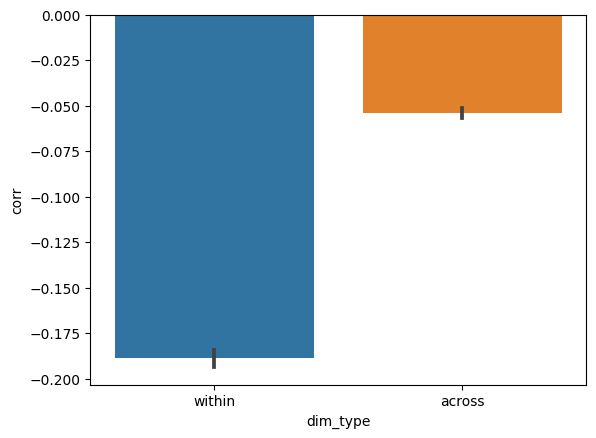

In [19]:
sns.barplot(res, x="dim_type", y="corr")